# Dataset

We use the [sentiment140 dataset](https://www.kaggle.com/kazanova/sentiment140). It contains 1,600,000 tweets extracted using the twitter api. The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment.

It contains the following 6 fields:

1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
2. ids: The id of the tweet ( 2087)
3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.
5. user: the user that tweeted (robotickilldozr)
6. text: the text of the tweet (Lyx is cool)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [60]:
pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/87/0f/7630ee4fea60ebab5b0e3c35df570cb295c91ece537231a38105c0f243e8/lightgbm-4.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.3 MB 2.6 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 3.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.3 MB 3.5 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 3.3 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 3.3 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 2.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.3 MB 2.7 MB/s eta 0:00:01
   ------------------------------------

In [2]:
pip install --upgrade fsspec


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade lz4


     ---------------------------------------- 0.0/99.8 kB ? eta -:--:--
     --------------- ---------------------- 41.0/99.8 kB 991.0 kB/s eta 0:00:01
     ---------------------------------------- 99.8/99.8 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import nltk
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
#import lightgbm as lgb


from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [8]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lohit.ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv(r"C:\Users\lohit.ashwa\Downloads\archive\training.1600000.processed.noemoticon.csv",encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS

In [6]:
data.describe(include='all')

,target,ids,date,flag,user,TweetText
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,NaN,774362,1,659775,1581465
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1599999,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [7]:
data['target'].unique()

array([0, 4], dtype=int64)

In [8]:
data.dtypes

target        int64
ids           int64
date         object
flag         object
user         object
TweetText    object
dtype: object

Get a subset of data to speed it up.

In [9]:
import copy
data_ = copy.deepcopy(data)

positif_data = data_[data_.target==4].iloc[:80000,:]
negative_data = data_[data_.target==0].iloc[:80000,:]

sub_data = pd.concat([positif_data,negative_data],axis=0)

# Data explore

### Target

<Axes: >

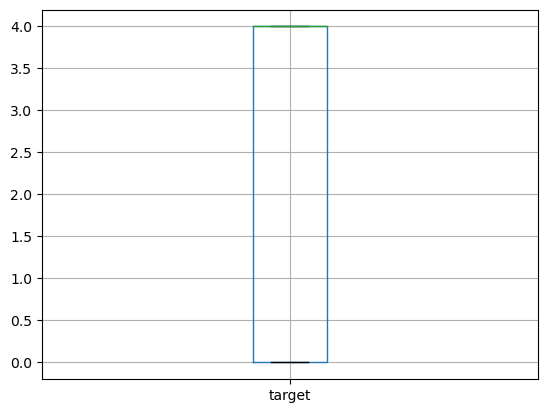

In [10]:
data.boxplot(column='target')

In [11]:
data_target=data.groupby('target')

In [12]:
data['target'].value_counts()

4    800000
0    799999
Name: target, dtype: int64

## Date

At what time do people like to tweet? Is there a clear link between the time of tweeting and the emotion of the content?

In [13]:
data.head()

,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Data preprocess

In [28]:
positif_data = data[data.target==4].iloc[:10000,:]
print(positif_data.shape)
negative_data = data[data.target==0].iloc[:10000,:]
print(negative_data.shape)
data = pd.concat([positif_data,negative_data],axis = 0)
print(data.shape)
data.head()

(10000, 6)
(10000, 6)
(20000, 6)


,target,ids,date,flag,user,TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [29]:
# Removing Twitter Handles (@user)
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "") 
# Removing links
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "") 
# Removing Punctuations, Numbers, and Special Characters
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ") 
# Remove stop words

nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

C:\Users\lohit.ashwa\AppData\Local\Temp\ipykernel_1240\2757619360.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "")
C:\Users\lohit.ashwa\AppData\Local\Temp\ipykernel_1240\2757619360.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lohit.ashwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,target,ids,date,flag,user,TweetText,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets u guys r best
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


In [ ]:
# Text Tokenization and Normalization
nltk.download('punkt')
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: nltk.word_tokenize(x))
data.head()

In [31]:
# Now let’s stitch these tokens back together
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
# Removing small words
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health uandpets guys best
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,meeting besties tonight cant wait girl talk
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter sunisa meet sho...
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much real food plus fr...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn effect everyone


In [65]:
data.to_csv(r"C:\Users\lohit.ashwa\Downloads\archive\processed data.csv")

# Models

In [4]:
data=pd.read_csv(r"C:\Users\lohit.ashwa\Downloads\archive\processed data.csv")

In [10]:
# Option 1: Drop rows with NaN values
data = data.dropna(subset=['Clean_TweetText'])

# Option 2: Fill NaN values with a placeholder string
data['Clean_TweetText'].fillna('UNKNOWN', inplace=True)


In [11]:
count_vectorizer = CountVectorizer(stop_words='english') 
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(19950, 24904)

In [29]:
cv.dtype

dtype('int64')

In [28]:
cv

<19950x24904 sparse matrix of type '<class 'numpy.int64'>'
	with 109578 stored elements in Compressed Sparse Row format>

In [12]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

### RandomForest

In [26]:
# RandomForest
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
print(accuracy_score(prediction_rf,y_test))

0.7047619047619048


In [22]:
import joblib

In [38]:
joblib.dump(rf,'C:\\Users\\lohit.ashwa\\Desktop\\New folder\\rf_model.pkl')


['C:\\Users\\lohit.ashwa\\Desktop\\New folder\\rf_model.pkl']

In [39]:
model=joblib.load(r'C:\Users\lohit.ashwa\Desktop\New folder\rf_model.pkl')

### XGBClassifier

In [13]:
y_train2=y_train.replace({4:1})
y_test2=y_test.replace({4:1})

In [20]:
# XGBC
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 6)
xgbc.fit(X_train,y_train2)
prediction_xgb = xgbc.predict(X_test)
print(accuracy_score(prediction_xgb,y_test2))

0.7042606516290727


In [30]:
print(xgb.__version__)

1.7.3


In [31]:
print(joblib.__version__)

1.2.0


In [24]:
joblib.dump(xgbc,'C:\\Users\\lohit.ashwa\\Desktop\\New folder\\xgbc_model.pkl')


['C:\\Users\\lohit.ashwa\\Desktop\\New folder\\xgbc_model.pkl']

In [25]:
model2=joblib.load(r'C:\Users\lohit.ashwa\Desktop\New folder\xgbc_model.pkl')

### Decision Tree Classifier

In [18]:
# Decision Tree using Entropy (with out pruning parameter)

dt = DecisionTreeClassifier( criterion='entropy')
dt.fit(X_train, y_train2) # training the model
predictions = dt.predict(X_test) # now testing on test data to get class of test data
print((accuracy_score(y_test2, predictions))) # comparing results predicted by model with actual

0.6734335839598997


### LightGBM 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import threading

# Load your dataset into a pandas DataFrame
# Replace 'data.csv' with the path to your dataset
data = pd.read_csv('data.csv')

# Assuming the target column is named 'target'
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set the hyperparameters for the LightGBM model
params = {
    'objective': 'binary',  # Binary classification
    'metric': 'binary_logloss',  # Logarithmic loss for binary classification
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'seed': 42,
    'nthread': 4  # Set the number of threads to utilize (you can adjust this based on your system)
}

# Function to train the LightGBM model
def train_model():
    global model
    model = lgb.train(params, train_data, num_boost_round=num_rounds)

# Create a thread for training the model
train_thread = threading.Thread(target=train_model)

# Start the training thread
train_thread.start()

# Wait for the training thread to finish
train_thread.join()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Calculate the accuracy and ROC-AUC score
accuracy = accuracy_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)
